In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [77]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [83]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [11]:
cast[['title','year']].drop_duplicates().title.value_counts().head(10)

Hamlet           17
Macbeth          15
Carmen           13
Maya             12
The Outsider     12
Temptation       11
Anna Karenina    10
She              10
Othello          10
Vengeance        10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [26]:
a = cast[cast.year.isin(list(range(1930,1941)))].loc[:,['title','year']].drop_duplicates()

In [40]:
a.groupby(by ='year').agg('count').sort_values('title',ascending=False).head(3)

,title
year,
1937,1053
1936,1044
1938,970


### Plot the number of films that have been released each decade over the history of cinema.

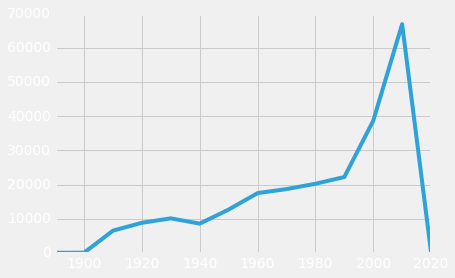

In [63]:
t = titles
(t.year // 10 * 10).value_counts().sort_index().plot(kind='line')

### Plot the number of "Hamlet" films made each decade.

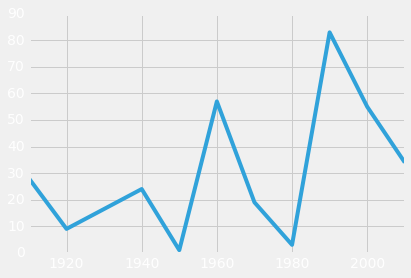

In [64]:
a = cast[cast.title == 'Hamlet'].loc[:,['title','year']]
(a.year // 10 * 10).value_counts().sort_index().plot(kind='line')

### Plot the number of "Rustler" characters in each decade of the history of film.

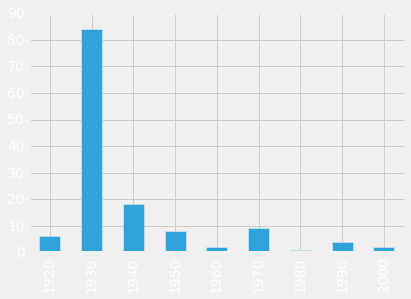

In [81]:
cast = cast[cast.character == 'Rustler']
cast['year'] = ((cast.year // 10) * 10)
cast.year.value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

/home/data-sci/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


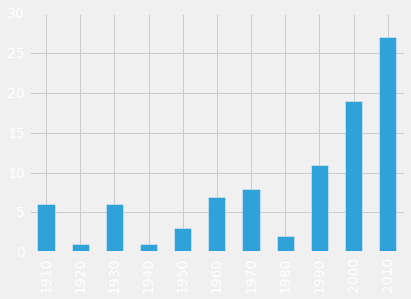

In [84]:
c = cast[cast.character == 'Hamlet']
c['year'] = ((c.year // 10) * 10)
c.year.value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [88]:
cast['character'].value_counts().head(12)

Himself        19503
Dancer         12003
Extra          10915
Reporter        8135
Doctor          7410
Student         7156
Policeman       6867
Party Guest     6724
Nurse           6649
Bartender       6588
Minor Role      6236
Zombie          6137
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [92]:
cast[cast['character']=='Himself'].name.value_counts().head(10)

Adolf Hitler             99
Richard Nixon            45
Ronald Reagan            39
John F. Kennedy          34
Winston Churchill        24
George W. Bush           23
Ron Jeremy               23
Benito Mussolini         22
Martin Luther King       21
Franklin D. Roosevelt    20
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [93]:
cast[cast.year == 1945].name.value_counts().head(10)

Emmett Vogan        39
Sam (II) Harris     32
Bess Flowers        29
Harold Miller       29
Frank O'Connor      27
Nolan Leary         27
Franklyn Farnum     26
Larry Steers        25
Tom London          24
Charles Sullivan    24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [94]:
cast[cast.year == 1985].name.value_counts().head(10)

Shakti Kapoor    21
Mammootty        21
Sukumari         19
Raj Babbar       15
Aruna Irani      15
Mohanlal         15
Lou Scheimer     15
Deven Verma      13
Asrani           13
Rajesh Khanna    13
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

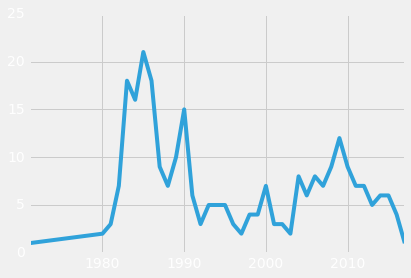

In [110]:
cast[cast.name == 'Mammootty'].year.value_counts().sort_index().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [115]:
cast[cast.character.str.startswith('Patron in')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             4
Patron in Restaurant             3
Patron in Club                   3
Patron in cabaret                3
Patron in booth                  2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [116]:
cast[cast.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         60
Science Fair Student     9
Science Student          9
Science Fair Judge       6
Science Kid              6
Science Promo Cadet      5
Science Reporter         5
Science Club Member      5
Science                  4
Science Fair Teacher     3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

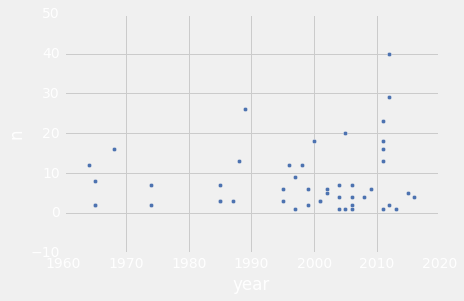

In [123]:
c = cast[cast.name == 'Judi Dench'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year',y='n',kind='scatter')


### Plot the n-values of Cary Grant's roles through his career.

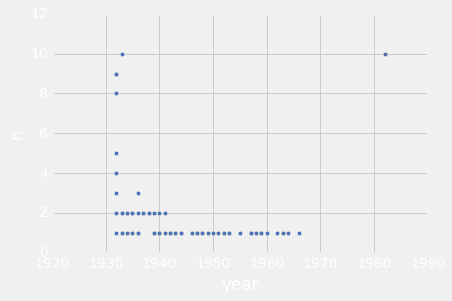

In [127]:
c = cast[cast.name.str.startswith("Cary Gra")].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year',y='n',kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

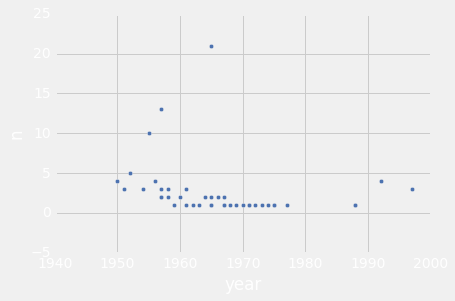

In [132]:
cast[cast.name == 'Sidney Poitier'].sort_index().plot(x='year',y='n',kind= 'scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [135]:
cast[(cast.n == 1) & (cast.year == 1950)].loc[:,'type'].value_counts()

actor      622
actress    281
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [138]:
cast[(cast.n == 2) & (cast.year == 1950)].loc[:,'type'].value_counts()

actor      436
actress    412
Name: type, dtype: int64